# **Project**

## **Goal:** is to perform an Exploratory Data Analysis (EDA) for Sleep Disorder Dataset.

## **EDA** includes below:
- Check duplicates
- Check missing values and missing value imputation
- Check Summary Statistics
- Check Correlation
- Check Data Distribution


# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [2]:
df = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Age Group,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,27-29,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,27-29,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,27-29,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,27-29,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,27-29,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# Duplicates

In [3]:
def duplicate_values(data):
  return data.duplicated().sum()

In [4]:
print("Total Duplicates:", duplicate_values(df))

Total Duplicates: 0


# Missing Value Imputation

In [5]:
# Missing Values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Person ID                    0
Gender                       0
Age                          0
Age Group                    0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


In [6]:
def missing_value_impute(df):
  return df.fillna('None', inplace = True)

In [7]:
missing_value_impute(df['Sleep Disorder'])

# Summary Statistics

In [8]:
def summary_statistics(data):
  return data.describe()

In [9]:
print("Summary Statistics:")
summary_statistics(df)

Summary Statistics:


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


# Correlations

In [10]:
def correlation_matrix(data):
  return data.corr()

In [11]:
columns = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']
print("Correlation Matrix:")
correlation_matrix(df[columns])

Correlation Matrix:


,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Age,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973
Sleep Duration,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533
Quality of Sleep,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791
Physical Activity Level,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723
Stress Level,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829
Heart Rate,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309
Daily Steps,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000


# Data Distribution

In [12]:
def plot_distributions(df):
    # Create a 4x2 subplot grid
    fig, axes = plt.subplots(4, 2, figsize=(15, 20))
    fig.suptitle('Distributions of Various Metrics', fontsize=16)

    # List of column names to plot
    columns = ['Age', 'Sleep Duration', 'Quality of Sleep',
               'Physical Activity Level', 'Stress Level',
               'Heart Rate', 'Daily Steps']

    # Plot each column
    sns.histplot(df['Age'], bins=5, kde=True, ax=axes[0, 0]).set_title('Age Distribution')
    sns.histplot(df['Sleep Duration'], bins=5, kde=True, ax=axes[0, 1]).set_title('Sleep Duration Distribution')
    sns.histplot(df['Quality of Sleep'], bins=5, kde=True, ax=axes[1, 0]).set_title('Quality of Sleep Distribution')
    sns.histplot(df['Physical Activity Level'], bins=5, kde=True, ax=axes[1, 1]).set_title('Physical Activity Level Distribution')
    sns.histplot(df['Stress Level'], bins=5, kde=True, ax=axes[2, 0]).set_title('Stress Level Distribution')
    sns.histplot(df['Heart Rate'], bins=5, kde=True, ax=axes[2, 1]).set_title('Heart Rate Distribution')
    sns.histplot(df['Daily Steps'], bins=5, kde=True, ax=axes[3, 0]).set_title('Daily Steps Distribution')

    # Adjust layout for better fit
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

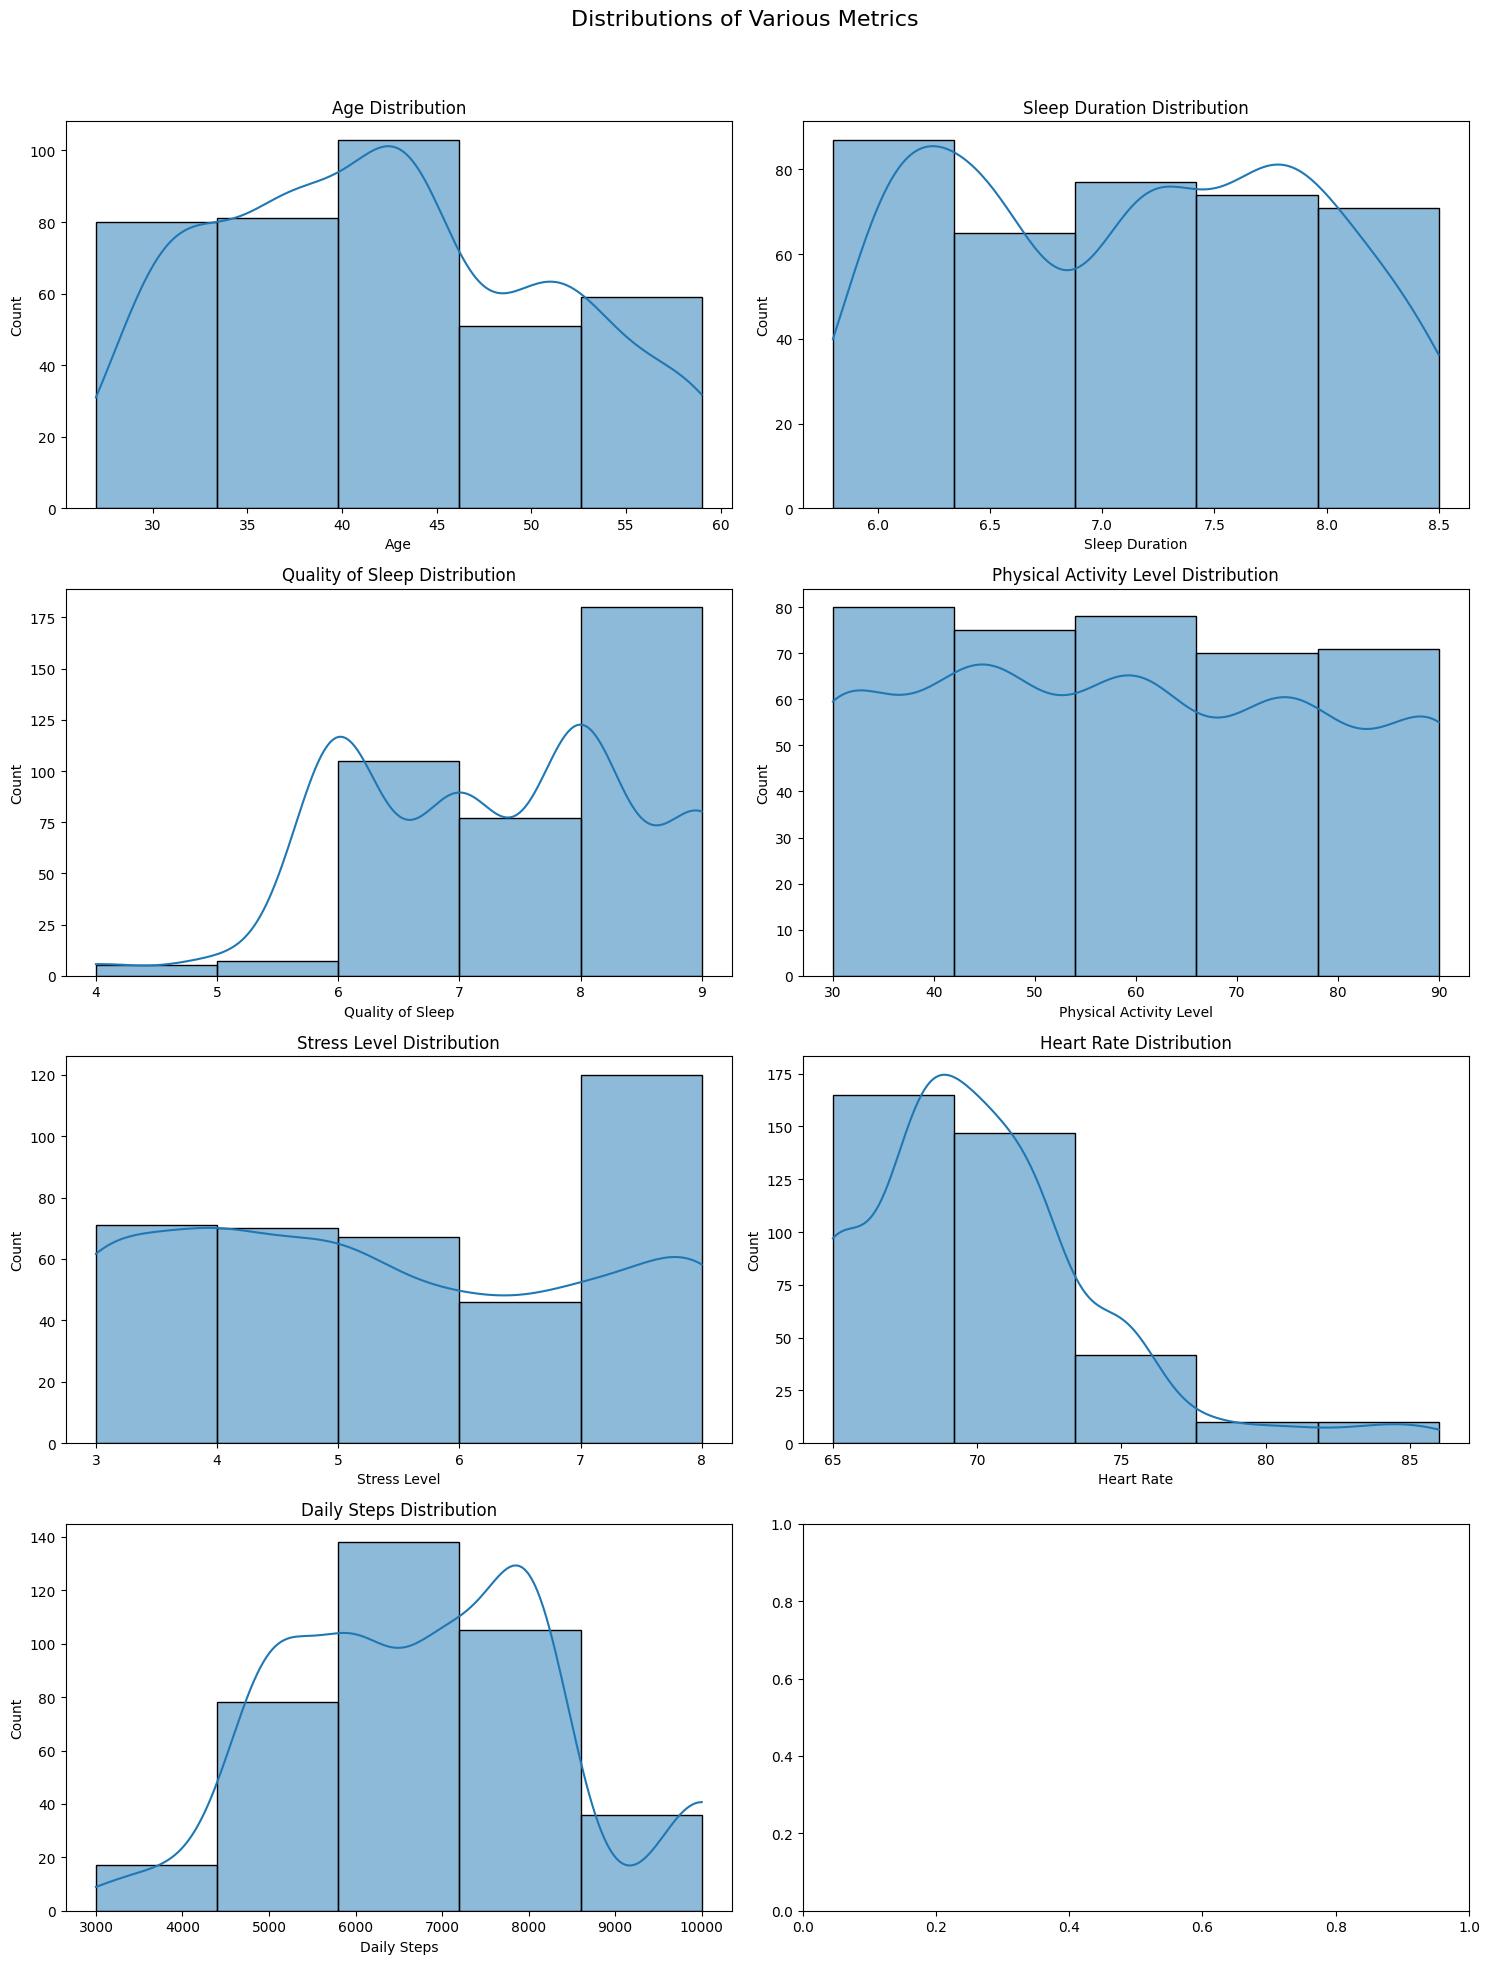

In [13]:
plot_distributions(df)

# **Summary**
- Imputed missing values as 'None' that refers to observations do not have any sleeping disorder
- In Correlation, positive values shows there is a positive correlation between variables but might need further investigation for causation
- Distribution shows how the variables are distributed such as if towards mean or skewed
- This EDA helps us build dashboard by providing a good understanding of the dataset
- *Note:* Details about findings are included in the project presentation slides